:D

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import hypergeom, chi2_contingency
import upsetplot as up
import glob
import csv

In [2]:
#Importo tabla con resultados:

combined_df = pd.read_csv("combined_annotations.csv")
print(combined_df.head())

                   #query                  seed_ortholog         evalue  \
0  Prodigal_2|LOCUS_00010            331678.Cphamn1_1961   2.230000e-26   
1  Prodigal_3|LOCUS_00020            1242864.D187_003286  5.080000e-106   
2  Prodigal_4|LOCUS_00030  1038858.AXBA01000001_gene3203   6.210000e-42   
3  Prodigal_6|LOCUS_00050   1382306.JNIM01000001_gene888  1.140000e-121   
4  Prodigal_7|LOCUS_00060              526222.Desal_0144   5.200000e-31   

   score                                         eggNOG_OGs  \
0  102.0                  COG4113@1|root,COG4113@2|Bacteria   
1  330.0  COG0513@1|root,COG0513@2|Bacteria,1MU49@1224|P...   
2  140.0  COG0278@1|root,COG0278@2|Bacteria,1MZ4V@1224|P...   
3  362.0  COG0042@1|root,COG0042@2|Bacteria,2G6XB@200795...   
4  117.0  COG0242@1|root,COG0242@2|Bacteria,1RA2P@1224|P...   

               max_annot_lvl COG_category  \
0                 2|Bacteria            S   
1  28221|Deltaproteobacteria            L   
2  28211|Alphaproteobacteria       

In [3]:
# Mapping of MAG names to taxon names
mag_to_taxon = {
    "C_27077.fna": "UBA5704 (a)",
    "C_maxbin_C.028.fasta": "HGW-15",
    "C_metabat_C.121.fa": "ZC4RG35 (a)",
    "C_metabat_C.124.fa": "Micropepsaceae",
    "C_metabat_C.125.fa": "SZUA-232",
    "C_metabat_C.19.fa": "Nitriliruptoraceae",
    "C_metabat_C.25.fa": "E44-bin32 (a)",
    "C_metabat_C.37.fa": "SZUA-229",
    "C_metabat_C.46.fa": "JABDQX01",
    "C_metabat_C.60.fa": "UBA5704 (b)",
    "C_metabat_C.7.fa": "Pseudonocardiaceae",
    "C_metabat_C.74.fa": "Balneolaceae (a)",
    "C_metabat_C.81.fa": "Promineofilaceae (a)",
    "C_metabat_C.83.fa": "UBA5704 (c)",
    "C_metabat_C.95.fa": "J153",
    "C_metabat_C.98.fa": "ZC4RG35 (b)",
    "CW_23909.fna": "Woeseiaceae (a)",
    "CW_maxbin_CW.098": "Nitrososphaeraceae (a)",
    "CW_maxbin_CW.218": "Nitrososphaeraceae (b)",
    "CW_metabat_CW.108.fa": "RKRQ02 (a)",
    "CW_metabat_CW.111.fa": "UBA6522 (a)",
    "CW_metabat_CW.121.fa": "Methyloligellaceae",
    "CW_metabat_CW.123.fa": "E44-bin32 (b)",
    "CW_metabat_CW.131.fa": "UBA6522 (b)",
    "CW_metabat_CW.20.fa": "SG8-38",
    "CW_metabat_CW.37.fa": "UBA6522 (c)",
    "CW_metabat_CW.57.fa": "UBA6522 (d)",
    "CW_metabat_CW.86.fa": "UBA4486",
    "CW_metabat_CW.95.fa": "JACQBZ02",
    "CW_metabat_CW.96.fa": "GWC2-71-9",
    "L_25727.fna": "Sporolactobacillaceae (a)",
    "L_maxbin_L.002": "Paenibacillaceae",
    "L_maxbin_L.006": "Domibacillaceae",
    "L_maxbin_L.259": "Sporolactobacillaceae (b)",
    "L_metabat_L.102.fa": "Jiangellales",
    "L_metabat_L.108.fa": "SM23-39",
    "L_metabat_L.119.fa": "Flavobacteriaceae",
    "L_metabat_L.121.fa": "Streptomycetaceae",
    "L_metabat_L.18.fa": "Rhodobacteraceae",
    "L_metabat_L.41.fa": "RKRQ01",
    "L_metabat_L.45.fa": "Cellulomonadaceae",
    "L_metabat_L.59.fa": "CECT-8803",
    "L_metabat_L.70.fa": "UBA8139",
    "L_metabat_L.95.fa": "Planctomycetaceae",
    "LW_10211.fna": "GWA1-39-11",
    "LW_10984.fna": "DSSB01",
    "LW_maxbin_LW.013": "Latescibacterales",
    "LW_maxbin_LW.016": "Bacillaceae_C",
    "LW_maxbin_LW.091": "Cyclobacteriaceae",
    "LW_maxbin_LW.269": "Lacipirellulaceae",
    "LW_maxbin_LW.310": "SZUA-584",
    "LW_metabat_LW.102.fa": "JAFGWO01",
    "LW_metabat_LW.105.fa": "QNYZ01",
    "LW_metabat_LW.111.fa": "UBA6522 (e)",
    "LW_metabat_LW.129.fa": "UBA11606",
    "LW_metabat_LW.136.fa": "Alkalibacteraceae",
    "LW_metabat_LW.149.fa": "Balneolaceae (b)",
    "LW_metabat_LW.17.fa": "Promineofilaceae (b)",
    "LW_metabat_LW.43.fa": "Desulfobacterales",
    "LW_metabat_LW.90.fa": "UMGS416",
    "LW_metabat_LW.95.fa": "Anaerolineaceae",
    "P_18661.fna": "Halobacteriales (a)",
    "P_25546.fna": "Hyphomicrobiaceae",
    "P_25897.fna": "JAENVV01",
    "P_maxbin_P.068": "SG8-13 (a)",
    "P_maxbin_P.091": "HXMU1428-3",
    "P_metabat_P.121.fa": "RKSH01",
    "P_metabat_P.131.fa": "SG8-41",
    "P_metabat_P.37.fa": "RKRQ02 (b)",
    "P_metabat_P.50.fa": "Woeseiaceae (b)",
    "P_metabat_P.57.fa": "Halobacteriales (b)",
    "P_metabat_P.77.fa": "SG8-13 (b)",
    "PW_19550.fna": "70-9 (a)",
    "PW_metabat_PW.84.fa": "70-9 (b)"
}

In [4]:
order =  ['Sporolactobacillaceae (a)', 'Domibacillaceae', 'Paenibacillaceae', 'UMGS416', 'SZUA-584', 'Latescibacterales', 
           'GWA1-39-11', 'Alkalibacteraceae', 'Balneolaceae (b)', 'RKRQ02 (b)', 'JABDQX01', 'Micropepsaceae', 'UBA5704 (b)', 
           'Woeseiaceae (a)', 'UBA6522 (c)', 'UBA6522 (b)', 'UBA6522 (a)', 'UBA5704 (c)', 'Nitrososphaeraceae (b)', 'E44-bin32 (b)', 
           'Methyloligellaceae', 'GWC2-71-9', 'UBA6522 (d)', 'Nitrososphaeraceae (a)', 'UBA4486', 'Rhodobacteraceae', 'Streptomycetaceae', 
           'Cyclobacteriaceae', 'Flavobacteriaceae', 'Cellulomonadaceae', 'SM23-39', 'Sporolactobacillaceae (b)', 'Bacillaceae_C',
           'Planctomycetaceae', 'QNYZ01', 'UBA6522 (e)', 'SG8-13 (b)', 'SG8-13 (a)', 'Desulfobacterales', 'Promineofilaceae (b)', 
           'JACQBZ02', 'SG8-38', 'Balneolaceae (a)', 'CECT-8803', 'Lacipirellulaceae', 'Pseudonocardiaceae', 'HXMU1428-3', '70-9 (a)', 
           'Promineofilaceae (a)', 'UBA8139', 'RKRQ01', 'Halobacteriales (b)', 'SZUA-232', 'J153', 'RKRQ02 (a)', 'UBA5704 (a)', 'JAENVV01',  
           'SG8-41', "Halobacteriales (a)", "Nitriliruptoraceae", "HGW-15", "ZC4RG35 (a)", "ZC4RG35 (b)", "E44-bin32 (a)", "Hyphomicrobiaceae",
           "Woeseiaceae (b)", "70-9 (b)", "UBA11606", "SZUA-229", "RKSH01", "JAFGWO01", "Jiangellales", "Anaerolineaceae", "DSSB01" ]

kokegg_countsfixed

In [5]:
#1. Extract KEGG Pathway information
kokegg_counts = combined_df[['MAG', 'KEGG_ko']].copy()

print(kokegg_counts.head(50))

             MAG                        KEGG_ko
0   LW_10984.fna                              -
1   LW_10984.fna                      ko:K11927
2   LW_10984.fna                      ko:K07390
3   LW_10984.fna                              -
4   LW_10984.fna                      ko:K01462
5   LW_10984.fna                      ko:K00604
6   LW_10984.fna                      ko:K01783
7   LW_10984.fna                              -
8   LW_10984.fna                              -
9   LW_10984.fna                              -
10  LW_10984.fna                      ko:K00864
11  LW_10984.fna                      ko:K00013
12  LW_10984.fna                      ko:K06213
13  LW_10984.fna                              -
14  LW_10984.fna                      ko:K00784
15  LW_10984.fna                      ko:K00833
16  LW_10984.fna                              -
17  LW_10984.fna                      ko:K03640
18  LW_10984.fna                              -
19  LW_10984.fna                      ko

In [6]:
kokegg_counts.set_index('MAG', inplace=True)

In [7]:
# Step 2: Construct a table where MAGs are represented as rows and KEGG_ko annotations as columns.
# The counts are adjusted to account for multiple KEGG_ko annotations per CDS within a MAG.
# Specifically, if a CDS in a MAG is annotated with multiple KEGG_ko entries 
# (e.g., "ko:K01657,ko:K01665,ko:K13950") multiple times, the count is distributed 
# equally among the annotated KEGG_kos. This prevents overestimation of individual KEGG_ko occurrences.

#Remove rows where KEGG_ko is "-"
kokegg_countsfixed = kokegg_counts[kokegg_counts["KEGG_ko"] != "-"]

#Initialize a dictionary to store the counts
ko_counts = {}

#Iterate through the DataFrame
for index, row in kokegg_countsfixed.iterrows():
    mag = index  # Extract MAG (from index)
    pathways = row["KEGG_ko"].split(",")  # Split multiple KOs
    
    num_pathways = len(pathways)  # Number of KOs
    
    if mag not in ko_counts:
        ko_counts[mag] = {}
    
    # Step 4: Distribute the count across pathways
    for pathway in pathways:
        if pathway not in ko_counts[mag]:
            ko_counts[mag][pathway] = 0
        
        distributed_count = 1 / num_pathways  # Even distribution
        ko_counts[mag][pathway] += distributed_count

#Convert to DataFrame
kokegg_countsfixed = pd.DataFrame.from_dict(ko_counts, orient='index').fillna(0)

In [8]:
print(kokegg_countsfixed.head())

                     ko:K11927  ko:K07390  ko:K01462  ko:K00604  ko:K01783  \
LW_10984.fna               2.0        1.0        1.0        1.0        1.0   
C_metabat_C.60.fa          1.0        0.0        2.0        1.0        1.0   
L_metabat_L.119.fa         1.0        0.0        1.0        1.0        1.0   
L_metabat_L.121.fa         1.0        0.0        1.0        1.0        1.0   
LW_metabat_LW.43.fa        1.0        0.0        0.5        1.0        1.0   

                     ko:K00864  ko:K00013  ko:K06213  ko:K00784  ko:K00833  \
LW_10984.fna               1.0        1.0        2.0        1.0        1.0   
C_metabat_C.60.fa          0.0        0.0        3.0        2.0        0.0   
L_metabat_L.119.fa         1.0        1.0        1.0        2.0        0.0   
L_metabat_L.121.fa         0.0        0.0        1.0        1.0        1.0   
LW_metabat_LW.43.fa        1.0        1.0        0.0        1.0        0.0   

                     ...  ko:K12963  ko:K01261  ko:K18652  ko:

In [9]:
#3. Replace names

# Replace MAG names with taxon names
kokegg_countsfixed.index = kokegg_countsfixed.index.map(mag_to_taxon)

print(kokegg_countsfixed.index)

Index(['DSSB01', 'UBA5704 (b)', 'Flavobacteriaceae', 'Streptomycetaceae',
       'Desulfobacterales', 'SZUA-229', 'UBA5704 (a)', 'SG8-41',
       'Cellulomonadaceae', 'Planctomycetaceae', 'HXMU1428-3', 'CECT-8803',
       'JACQBZ02', 'Latescibacterales', 'Hyphomicrobiaceae',
       'Nitriliruptoraceae', 'Rhodobacteraceae', 'Cyclobacteriaceae',
       'UBA6522 (c)', 'J153', 'RKRQ01', 'RKRQ02 (b)', '70-9 (b)',
       'Micropepsaceae', 'RKSH01', 'SG8-38', 'UBA6522 (d)', 'RKRQ02 (a)',
       'SM23-39', 'UBA6522 (a)', 'Halobacteriales (a)', 'Methyloligellaceae',
       'JABDQX01', 'UBA6522 (b)', '70-9 (a)', 'Sporolactobacillaceae (b)',
       'Woeseiaceae (b)', 'Bacillaceae_C', 'ZC4RG35 (b)',
       'Sporolactobacillaceae (a)', 'JAFGWO01', 'Paenibacillaceae', 'UBA8139',
       'Pseudonocardiaceae', 'UBA6522 (e)', 'GWA1-39-11', 'UBA5704 (c)',
       'E44-bin32 (b)', 'HGW-15', 'Anaerolineaceae', 'JAENVV01', 'QNYZ01',
       'Promineofilaceae (b)', 'E44-bin32 (a)', 'Domibacillaceae',
       'P

In [10]:
#4. Reorder

# Reorder the DataFrame based on the specified taxon order
kokegg_countsfixed = kokegg_countsfixed.reindex(order)
# Check the updated DataFrame
print(kokegg_countsfixed.head())

                           ko:K11927  ko:K07390  ko:K01462  ko:K00604  \
Sporolactobacillaceae (a)        0.0        0.0        1.0        1.0   
Domibacillaceae                  0.0        0.0        1.0        1.0   
Paenibacillaceae                 0.0        0.0        1.0        1.0   
UMGS416                          0.0        0.0        0.0        1.0   
SZUA-584                         0.0        0.0        0.0        0.0   

                           ko:K01783  ko:K00864  ko:K00013  ko:K06213  \
Sporolactobacillaceae (a)        2.0        0.0        0.5        0.0   
Domibacillaceae                  1.0        0.0        0.0        0.0   
Paenibacillaceae                 0.0        0.0        0.0        0.0   
UMGS416                          0.0        1.0        1.0        0.0   
SZUA-584                         0.0        0.0        0.0        0.0   

                           ko:K00784  ko:K00833  ...  ko:K12963  ko:K01261  \
Sporolactobacillaceae (a)        0.0        

In [14]:
#5. Save files

# Save the combined dataframe to a new file
kokegg_countsfixed.to_csv("kokegg_countsfixedd.tsv", sep='\t')
kokegg_countsfixed.to_csv("kokegg_countsfixedd.csv")

In [53]:
#This is a verification for the creation of the adjusted table. I manually did the calculation with one KEGG_Ko and checked if
# the value in the table made in this script was correct.

try:
    value = kokegg_countsfixed.loc['DSSB01', 'ko:K01657']
    
    # Check if the value was found and display it
    if pd.notna(value):  # Check if the value is not NaN
        print(f"The value in row 'DSSB01' and column 'ko:K01657' is: {value}")
    else:
        print("The value is NaN for row 'DSSB01' and column 'ko:K01657'.")
except KeyError:
    print("Row 'DSSB01' not found.")

The value in row 'DSSB01' and column 'ko:K01657' is: 1.3333333333333333


Now that we have the table with KEGG KO counts per MAG, a normalization should be made to account for the completeness of each MAG.

In [42]:
completitud=pd.read_csv('completitud.tsv', sep="\t")

In [43]:
completitud.set_index('MAG', inplace=True)

In [44]:
print(completitud.head())

                      Completeness
MAG                               
70-9 (a)                    0.9612
70-9 (b)                    0.7069
Promineofilaceae (a)        0.6737
JABDQX01                    0.7771
UBA6522 (d)                 0.5504


In [54]:
# Find the common MAG values
common_mags = kokegg_countsfixed.index.intersection(completitud.index)

# Find the MAG values in KO matrix that are NOT in completeness data
missing_in_completeness = kokegg_countsfixed.index.difference(completitud.index)

# Print the results
if missing_in_completeness.empty:
    print("All MAG values in the KO matrix exist in the completeness data.")
else:
    print("The following MAG values are missing in the completeness data:")
    print(missing_in_completeness)

All MAG values in the KO matrix exist in the completeness data.


In [55]:
# Divide each value in the KO data by the corresponding completeness value
normalized_ko_data = kokegg_countsfixed.div(completitud['Completeness'], axis=0)

# Display the result
print(normalized_ko_data)

                   ko:K11927  ko:K07390  ko:K01462  ko:K00604  ko:K01783  \
70-9 (a)                 0.0   1.040366   1.040366   2.080732   1.040366   
70-9 (b)                 0.0   1.414627   1.414627   1.414627   1.414627   
Alkalibacteraceae        0.0   0.000000   1.163873   1.163873   1.163873   
Anaerolineaceae          0.0   0.000000   1.499925   1.499925   2.999850   
Bacillaceae_C            0.0   0.000000   1.149690   1.149690   2.299379   
...                      ...        ...        ...        ...        ...   
UMGS416                  0.0   0.000000   0.000000   1.479071   0.000000   
Woeseiaceae (a)          0.0   0.000000   0.000000   1.714972   1.714972   
Woeseiaceae (b)          0.0   1.313198   1.313198   1.313198   1.313198   
ZC4RG35 (a)              0.0   0.000000   2.525571   1.262786   1.262786   
ZC4RG35 (b)              0.0   0.000000   2.777392   1.388696   0.000000   

                   ko:K00864  ko:K00013  ko:K06213  ko:K00784  ko:K00833  ...  \
70-9 (

Now, lets add the categories found in script Categorization.ipynb from Taxonomic_classification

In [56]:
categories=pd.read_csv('categorías_signif.tsv', sep="\t")

In [57]:
categories.set_index('MAG', inplace=True)

In [58]:
print(categories.head())

                          Diferencias
MAG                                  
Sporolactobacillaceae (a)           A
Domibacillaceae                     A
Paenibacillaceae                    A
UMGS416                             A
SZUA-584                            A


PCoA Jaccard

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

In [64]:
# Compute the Jaccard distance matrix
distance_matrix = beta_diversity('jaccard', normalized_ko_data.values, ids=normalized_ko_data.index)

# Perform PCoA on the Jaccard distance matrix
pcoa_results = pcoa(distance_matrix)

# Create a DataFrame for the PCoA results
pcoa_df = pd.DataFrame(pcoa_results.samples[['PC1', 'PC2']], index=normalized_ko_data.index)

In [65]:
print(pcoa_df.head())

                        PC1       PC2
70-9 (a)          -0.045708 -0.150368
70-9 (b)          -0.082499 -0.075024
Alkalibacteraceae -0.087226  0.029373
Anaerolineaceae   -0.153629 -0.035146
Bacillaceae_C     -0.163120  0.035422


In [66]:
# Merge the PCoA results with the categories
merged_df = pd.merge(pcoa_df, categories, left_index=True, right_index=True)

# Define Colors Based on Categories
category_colors = {
    'A': "#73AF87",
    'B': "#295B6A",
    'C': "#AA822B",
    'D': "#93C1C2",
    'E': "#B1633A",
    'F': "#A6A6A6"
}

# Map the colors to the 'Diferencias' categories
merged_df['Color'] = merged_df['Diferencias'].map(category_colors)

/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1638: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1639: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.convert_yunits(self._center[1]))
/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1638: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

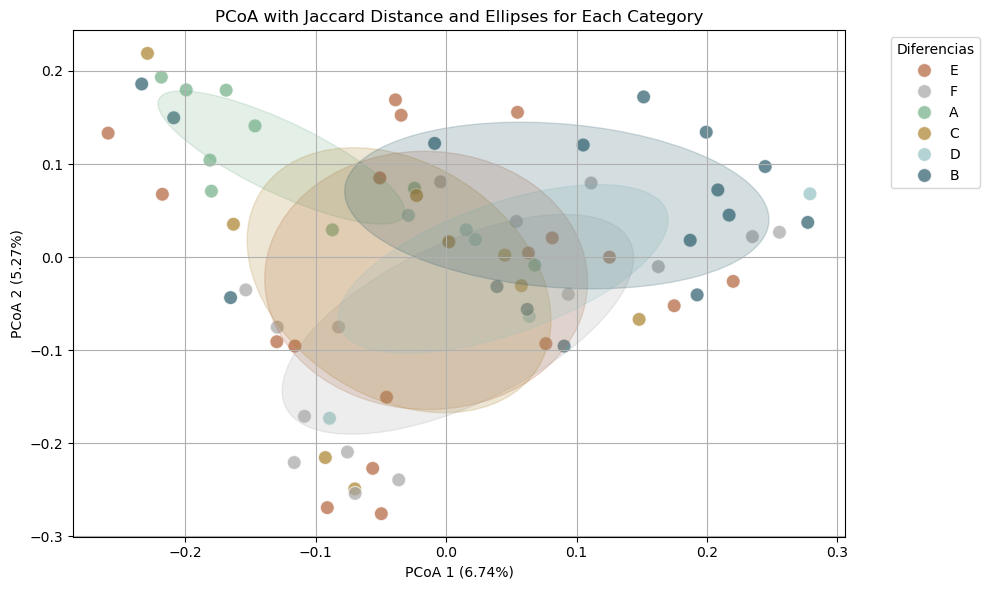

In [67]:
# Plot PCoA with Ellipses

plt.figure(figsize=(10, 6))

# Plot points colored by category
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='Diferencias', palette=category_colors, s=100, alpha=0.7)

# Create ellipses for each category
for level in merged_df['Diferencias'].unique():
    subset = merged_df[merged_df['Diferencias'] == level]
    if len(subset) > 1:  # Only attempt to create ellipses if there are enough points
        cov = np.cov(subset[['PC1', 'PC2']].values.T)
        mean = subset[['PC1', 'PC2']].mean()
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigvals)  # Width and height are 2 standard deviations
        ellipse = mpatches.Ellipse(mean, width, height, angle=angle, color=category_colors[level], alpha=0.2)
        plt.gca().add_patch(ellipse)
        

# Adjust the legend position
plt.legend(title='Diferencias', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.title('PCoA with Jaccard Distance and Ellipses for Each Category')
plt.xlabel(f'PCoA 1 ({pcoa_results.proportion_explained[0] * 100:.2f}%)')
plt.ylabel(f'PCoA 2 ({pcoa_results.proportion_explained[1] * 100:.2f}%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
explained_variance = pcoa_result.proportion_explained

# Display explained variance for each principal coordinate (PCoA axis)
print("Explained variance by each principal coordinate:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Coordinate {i+1}: {variance:.4f}")

# Alternatively, display only the first two PCoA axes
print(f"Principal Coordinate 1 explains {explained_variance[0]:.4f} of the variance.")
print(f"Principal Coordinate 2 explains {explained_variance[1]:.4f} of the variance.")

Explained variance by each principal coordinate:
Principal Coordinate 1: 0.0824
Principal Coordinate 2: 0.0671
Principal Coordinate 3: 0.0525
Principal Coordinate 4: 0.0462
Principal Coordinate 5: 0.0400
Principal Coordinate 6: 0.0353
Principal Coordinate 7: 0.0315
Principal Coordinate 8: 0.0266
Principal Coordinate 9: 0.0253
Principal Coordinate 10: 0.0227
Principal Coordinate 11: 0.0211
Principal Coordinate 12: 0.0196
Principal Coordinate 13: 0.0193
Principal Coordinate 14: 0.0179
Principal Coordinate 15: 0.0172
Principal Coordinate 16: 0.0166
Principal Coordinate 17: 0.0160
Principal Coordinate 18: 0.0155
Principal Coordinate 19: 0.0150
Principal Coordinate 20: 0.0143
Principal Coordinate 21: 0.0140
Principal Coordinate 22: 0.0134
Principal Coordinate 23: 0.0130
Principal Coordinate 24: 0.0125
Principal Coordinate 25: 0.0120
Principal Coordinate 26: 0.0117
Principal Coordinate 27: 0.0115
Principal Coordinate 28: 0.0113
Principal Coordinate 29: 0.0111
Principal Coordinate 30: 0.0110


/tmp/ipykernel_2201111/3704657504.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Principal Coordinate 1 explains {explained_variance[0]:.4f} of the variance.")
/tmp/ipykernel_2201111/3704657504.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Principal Coordinate 2 explains {explained_variance[1]:.4f} of the variance.")


In [69]:
# 1. Calculate Centroids and Pairwise Distances

from scipy.spatial.distance import pdist, squareform

# Calculate centroids for each category
centroids = merged_df.groupby('Diferencias')[['PC1', 'PC2']].mean()

# Calculate pairwise distances between centroids
centroid_distances = pd.DataFrame(
    squareform(pdist(centroids)),
    index=centroids.index,
    columns=centroids.index
)
print("Pairwise distances between category centroids:\n", centroid_distances)

Pairwise distances between category centroids:
 Diferencias         A         B         C         D         E         F
Diferencias                                                            
A            0.000000  0.217466  0.159744  0.207926  0.172500  0.224546
B            0.217466  0.000000  0.145152  0.079535  0.128512  0.148446
C            0.159744  0.145152  0.000000  0.080713  0.020753  0.065395
D            0.207926  0.079535  0.080713  0.000000  0.060326  0.068915
E            0.172500  0.128512  0.020753  0.060326  0.000000  0.053051
F            0.224546  0.148446  0.065395  0.068915  0.053051  0.000000


In [70]:
#permanova

from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix

# Create a distance matrix from your PCoA coordinates (PC1, PC2)
distance_matrix = pdist(merged_df[['PC1', 'PC2']])
distance_matrix = DistanceMatrix(squareform(distance_matrix), ids=merged_df.index)

# PERMANOVA test
result = permanova(distance_matrix, merged_df['Diferencias'])
print(result)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      74
number of groups                  6
test statistic             3.487254
p-value                       0.003
number of permutations          999
Name: PERMANOVA results, dtype: object


/tmp/ipykernel_2201111/2702987333.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Diferencias', y='PC1', palette=category_colors, order=category_order)
/tmp/ipykernel_2201111/2702987333.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Diferencias', y='PC2', palette=category_colors, order=category_order)


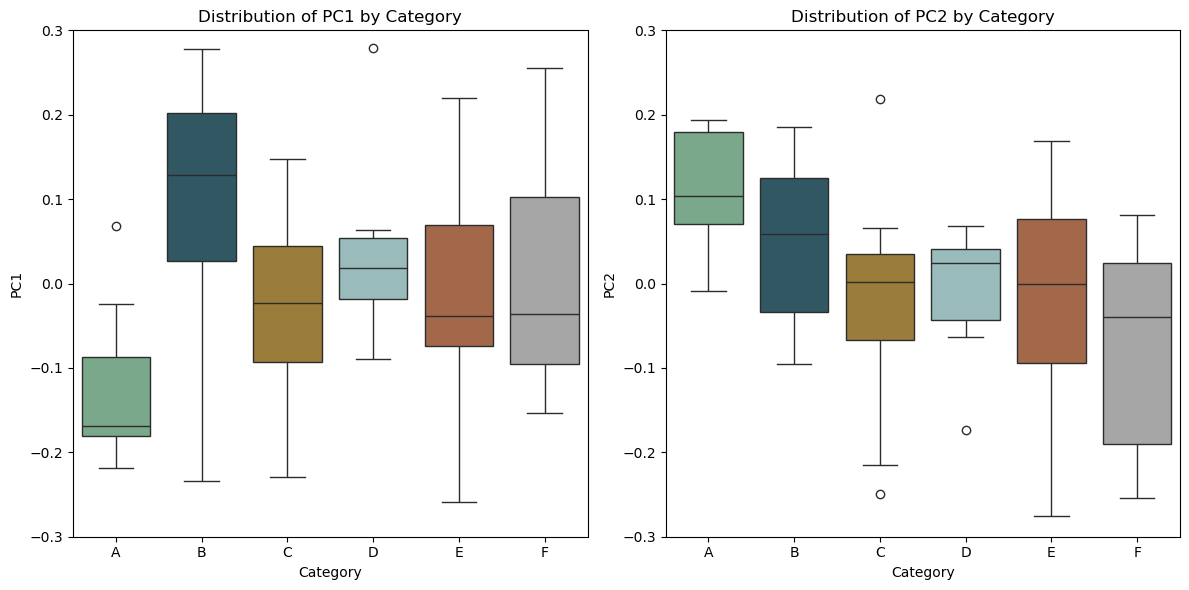

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order for the categories
category_order = ['A', 'B', 'C', 'D', 'E', 'F']

# Plot boxplots for PC1 and PC2
plt.figure(figsize=(12, 6))

# Boxplot for PC1
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_df, x='Diferencias', y='PC1', palette=category_colors, order=category_order)
plt.title('Distribution of PC1 by Category')
plt.xlabel('Category')
plt.ylabel('PC1')
plt.ylim(-0.3, 0.3)  # Set y-axis limits

# Boxplot for PC2
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df, x='Diferencias', y='PC2', palette=category_colors, order=category_order)
plt.title('Distribution of PC2 by Category')
plt.xlabel('Category')
plt.ylabel('PC2')
plt.ylim(-0.3, 0.3)  # Set y-axis limits

plt.tight_layout()
plt.show()